<a href="https://colab.research.google.com/github/arpitamangal/text-to-image-generation/blob/main/TryIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-cv==0.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.3/595.3 kB 11.2 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import keras_cv
import matplotlib.pyplot as plt

In [11]:
weights_path = tf.keras.utils.get_file(
    origin="https://huggingface.co/datasets/arpitamangal/flower-blip-weights/resolve/main/flower-weights.h5"
)
img_height = img_width = 512
flower_model = keras_cv.models.StableDiffusion(
    img_width=img_width, img_height=img_height
)
flower_model.diffusion_model.load_weights(weights_path)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [5]:
def plot_images(images, title):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(title, fontsize=12)
        plt.axis("off")

25/25 [==============================] - 61s 2s/step


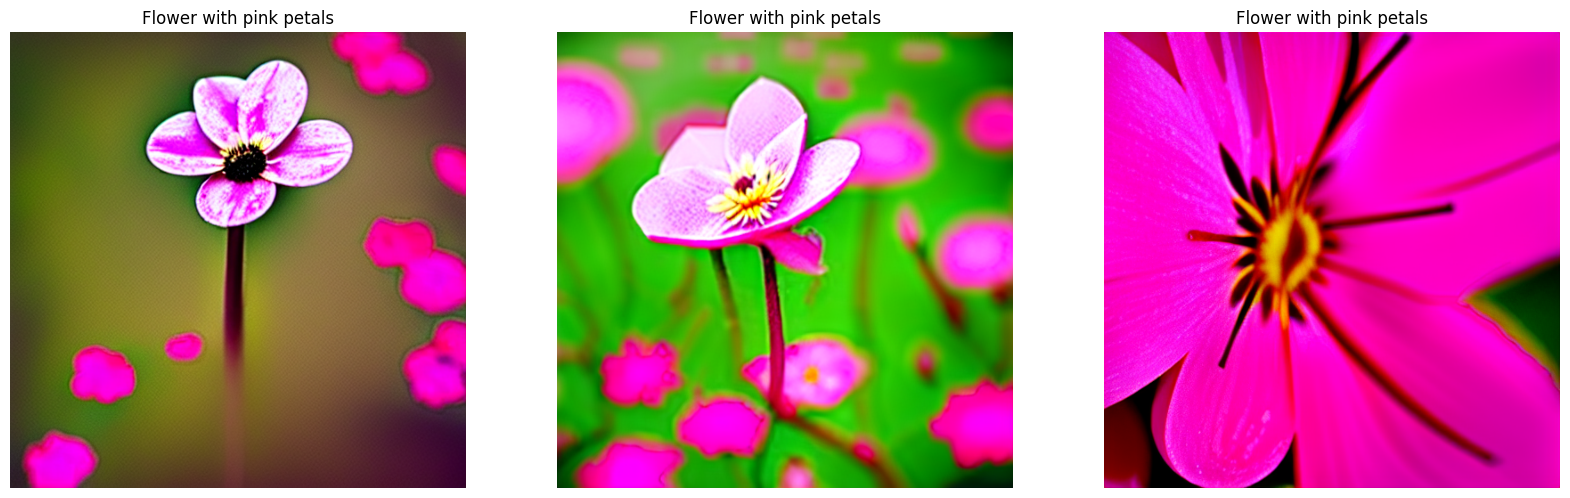

In [10]:
prompt = "Flower with pink petals"
variations_of_image = 3
generated_image = flower_model.text_to_image(prompt, batch_size=variations_of_image, unconditional_guidance_scale=40)
plot_images(generated_image, prompt)